<a href="https://colab.research.google.com/github/Laureoby/building_dataset/blob/main/building_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Building_Permits.csv')
df.head()

<ipython-input-4-aa287459b5c5>:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Building_Permits.csv')


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [7]:
#We drop all colmns which has more than 160000 Nan values
#We also drop columns
df = df.drop(['Street Number Suffix', 'Structural Notification', 'Unit', 'Unit Suffix', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'TIDF Compliance', 'Site Permit'], axis=1)
df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,St,street space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,St,fire alarm upgrade ref 201704123852,...,2.0,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,St,street space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,St,street space permit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [9]:
df['Street Suffix'].fillna(df['Street Suffix'].mode()[0], inplace=True)

In [10]:
df['Description'].fillna('No description', inplace=True)

In [11]:
# selectionner les colonnes à ùodifier dans le dataset
select_columns = ['Issued Date', 'Completed Date', 'First Construction Document Date', 'Permit Expiration Date', 'Location', 'Neighborhoods - Analysis Boundaries']

# Boucle pour traiter chaque colonne
for column in select_columns:
    # Trouver le mode pour chaque colonne
    mode_col = df[column].mode()[0]

    # Remplacer les NaN pour chaque colonne
    df[column].fillna(mode_col, inplace=True)

In [12]:
#We use interpolation
def interpolate_columns(df, columns, method='linear'):
    """
    Applique l'interpolation à des colonnes spécifiées dans un DataFrame.

    Args:
    df (pd.DataFrame): DataFrame contenant les données.
    columns (list of str): Liste des noms de colonnes à interpoler.
    method (str, optional): Méthode d'interpolation à utiliser. Par défaut 'linear'.
    """
    for column in columns:
        if df[column].dtype.kind in 'biufc':  # Assurez-vous que la colonne est de type numérique
            df[column].interpolate(method=method, inplace=True)
        else:
            print(f"La colonne {column} n'est pas de type numérique et ne peut pas être interpolée.")

# Usage de la fonction
columns_to_interpolate = ['Number of Existing Stories', 'Number of Proposed Stories', 'Estimated Cost', 'Revised Cost', 'Existing Units', 'Proposed Units', 'Plansets', 'Existing Construction Type', 'Proposed Construction Type', 'Supervisor District', 'Zipcode']
interpolate_columns(df, columns_to_interpolate)

In [13]:
fill_values = {'Existing Use': 'Unknown use', 'Proposed Use': 'Unknown use'}
df.fillna(value=fill_values, inplace=True)
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
Completed Date                                0
First Construction Document Date              0
Number of Existing Stories                    0
Number of Proposed Stories                    2
Permit Expiration Date                        0
Estimated Cost                                0
Revised Cost                            

In [14]:
def random_country():
    return np.random.choice(['wood frame (5)', 'constr type 1', 'constr type 3', 'constr type 2', 'constr type 4'])
df['Existing Construction Type Description'] = df['Existing Construction Type Description'].fillna(df['Existing Construction Type Description'].apply(lambda x: random_country() if pd.isna(x) else x))
df['Proposed Construction Type Description'] = df['Proposed Construction Type Description'].fillna(df['Proposed Construction Type Description'].apply(lambda x: random_country() if pd.isna(x) else x))
df.isnull().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Name                               0
Street Suffix                             0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
Completed Date                            0
First Construction Document Date          0
Number of Existing Stories                0
Number of Proposed Stories                2
Permit Expiration Date                    0
Estimated Cost                            0
Revised Cost                              0
Existing Use                              0
Existing Units                  

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Name                               0
Street Suffix                             0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
Completed Date                            0
First Construction Document Date          0
Number of Existing Stories                0
Number of Proposed Stories                0
Permit Expiration Date                    0
Estimated Cost                            0
Revised Cost                              0
Existing Use                              0
Existing Units                  

##**Data visualization and users stories**

As an urban planner,

I want to analyze the distribution of permits by permit type and neighborhood over time, so that I can understand development trends and plan for future infrastructure needs in specific areas.


In [16]:
# Convert 'Filed Date' to datetime
df['Filed Date'] = pd.to_datetime(df['Filed Date'])
# Extract the year from 'Filed Date'
df['Year'] = df['Filed Date'].dt.year
# Group by Year, Permit Type, and Neighborhood
grouped_data = df.groupby(['Year', 'Permit Type', 'Neighborhoods - Analysis Boundaries']).size().reset_index(name='Count')

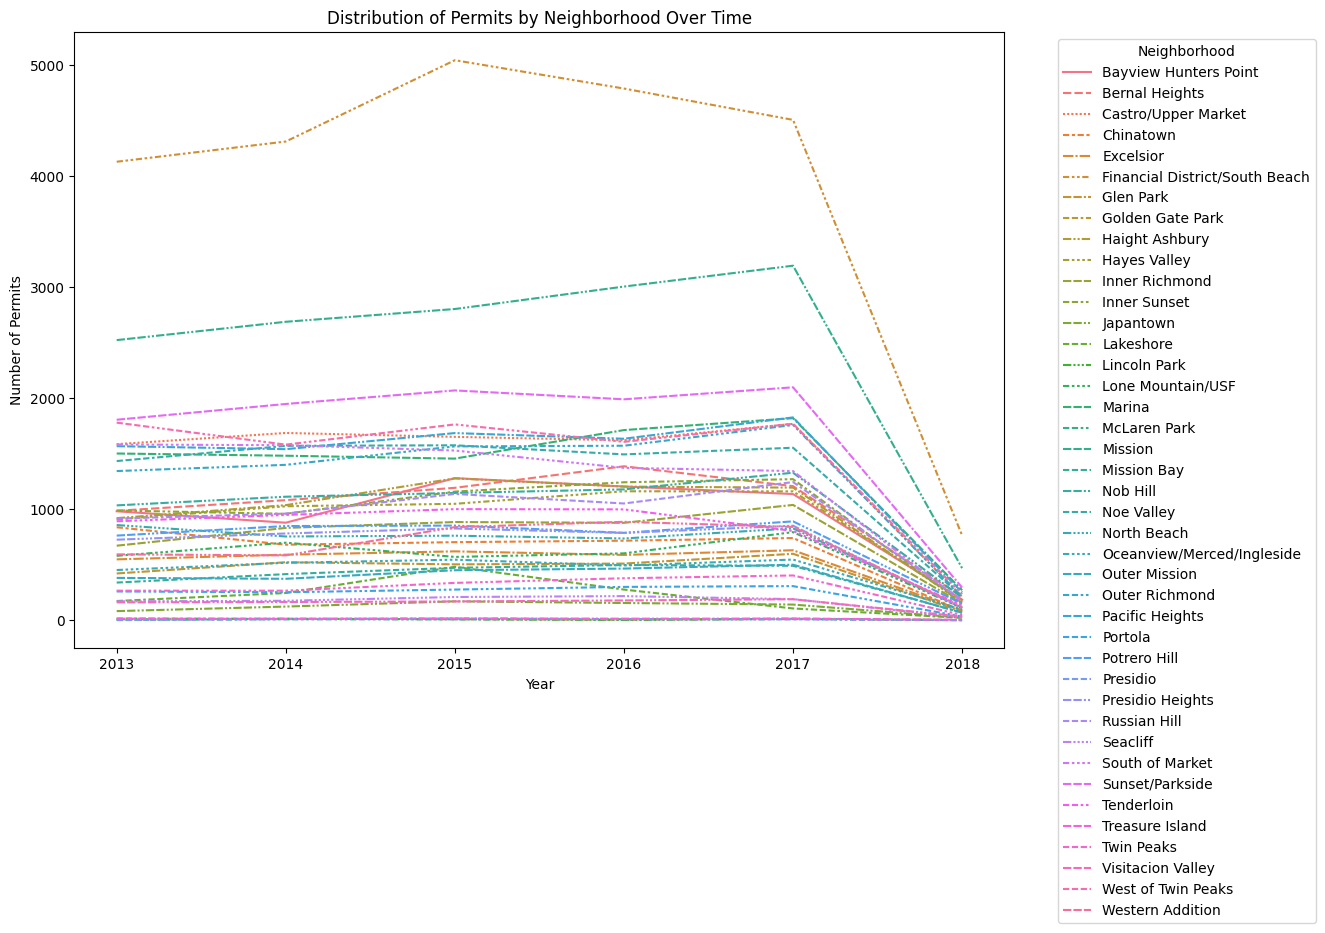

In [17]:
# Example: Time Series Plot for a specific permit type across neighborhoods
pivot_table = grouped_data.pivot_table(index='Year', columns='Neighborhoods - Analysis Boundaries', values='Count', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_table)
plt.title('Distribution of Permits by Neighborhood Over Time')
plt.ylabel('Number of Permits')
plt.xlabel('Year')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

As a public safety official,

I want to analyze construction projects by type and district, so that I can allocate safety resources and inspections based on areas with high activity levels and potentially higher risk.


In [18]:
summary = df.groupby(['Supervisor District', 'Permit Type Definition']).size().reset_index(name='Number of Projects')

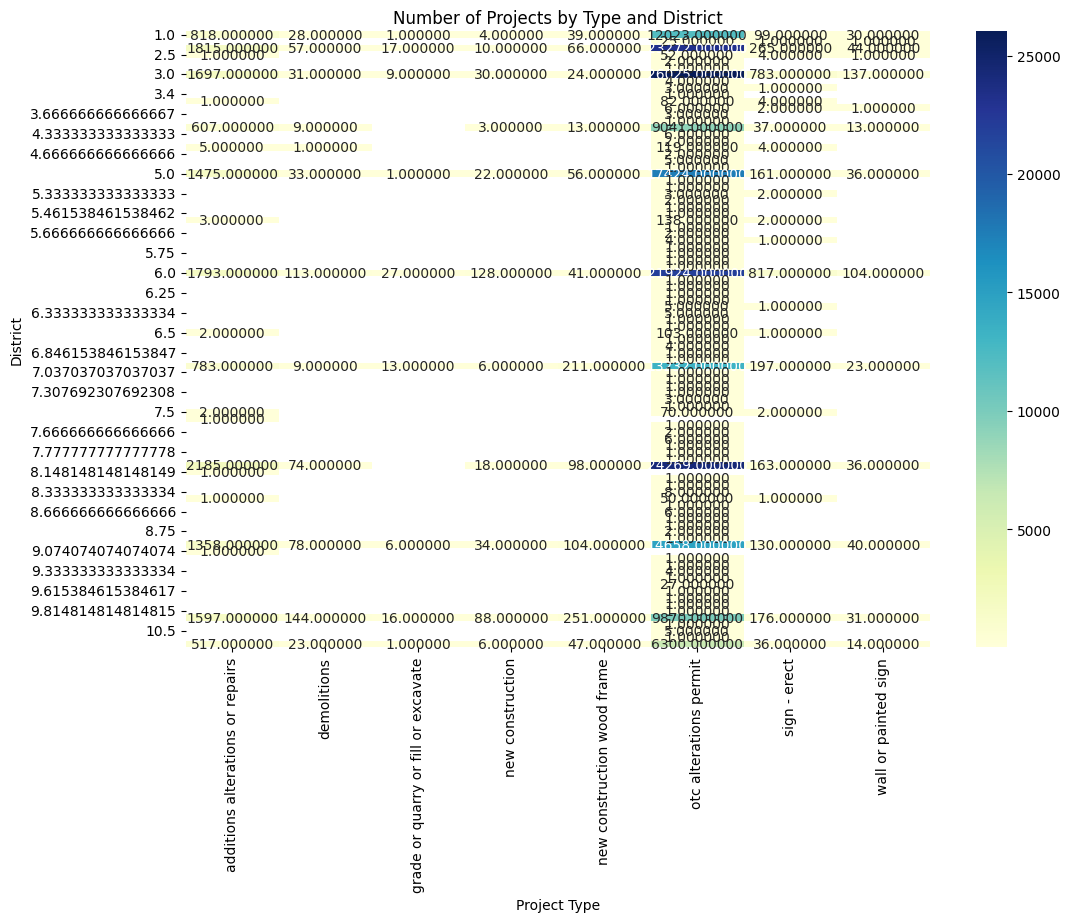

In [22]:
pivot_table = summary.pivot(index='Supervisor District', columns='Permit Type Definition', values='Number of Projects')

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="f", cmap='YlGnBu')
plt.title('Number of Projects by Type and District')
plt.xlabel('Project Type')
plt.ylabel('District')
plt.show()

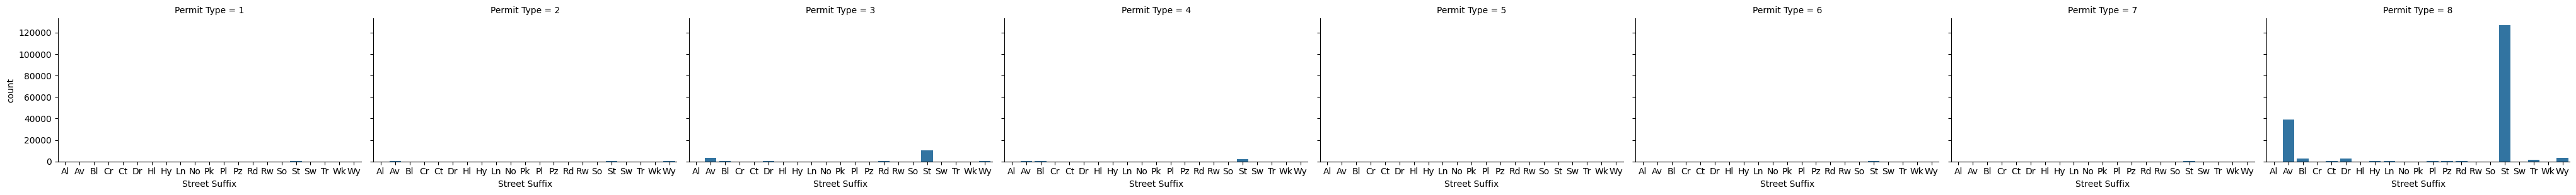

In [23]:
grid = sns.FacetGrid(df, col='Permit Type', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Street Suffix', order=sorted(df['Street Suffix'].unique()))
plt.show()